Cost of health insurance solution

In [1]:
# Empezamos haciendo un EDA

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# eliminamos duplicados 

total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# factorizamos todo para que sean numeros del 0 al 1

from sklearn.preprocessing import MinMaxScaler

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


Hacemos un EDA de todo el dataframe ya que es pequeño y nos puede aportar gran importancia

In [14]:
import pandas as pd

num_columnas = total_data.shape[1]

nombres_columnas = total_data.columns.tolist()

print("El DataFrame total_data tiene {} columnas:".format(num_columnas))
print(nombres_columnas)

El DataFrame total_data tiene 5 columnas:
['age', 'bmi', 'children', 'smoker_n', 'charges']


Análisis sobre variables categóricas

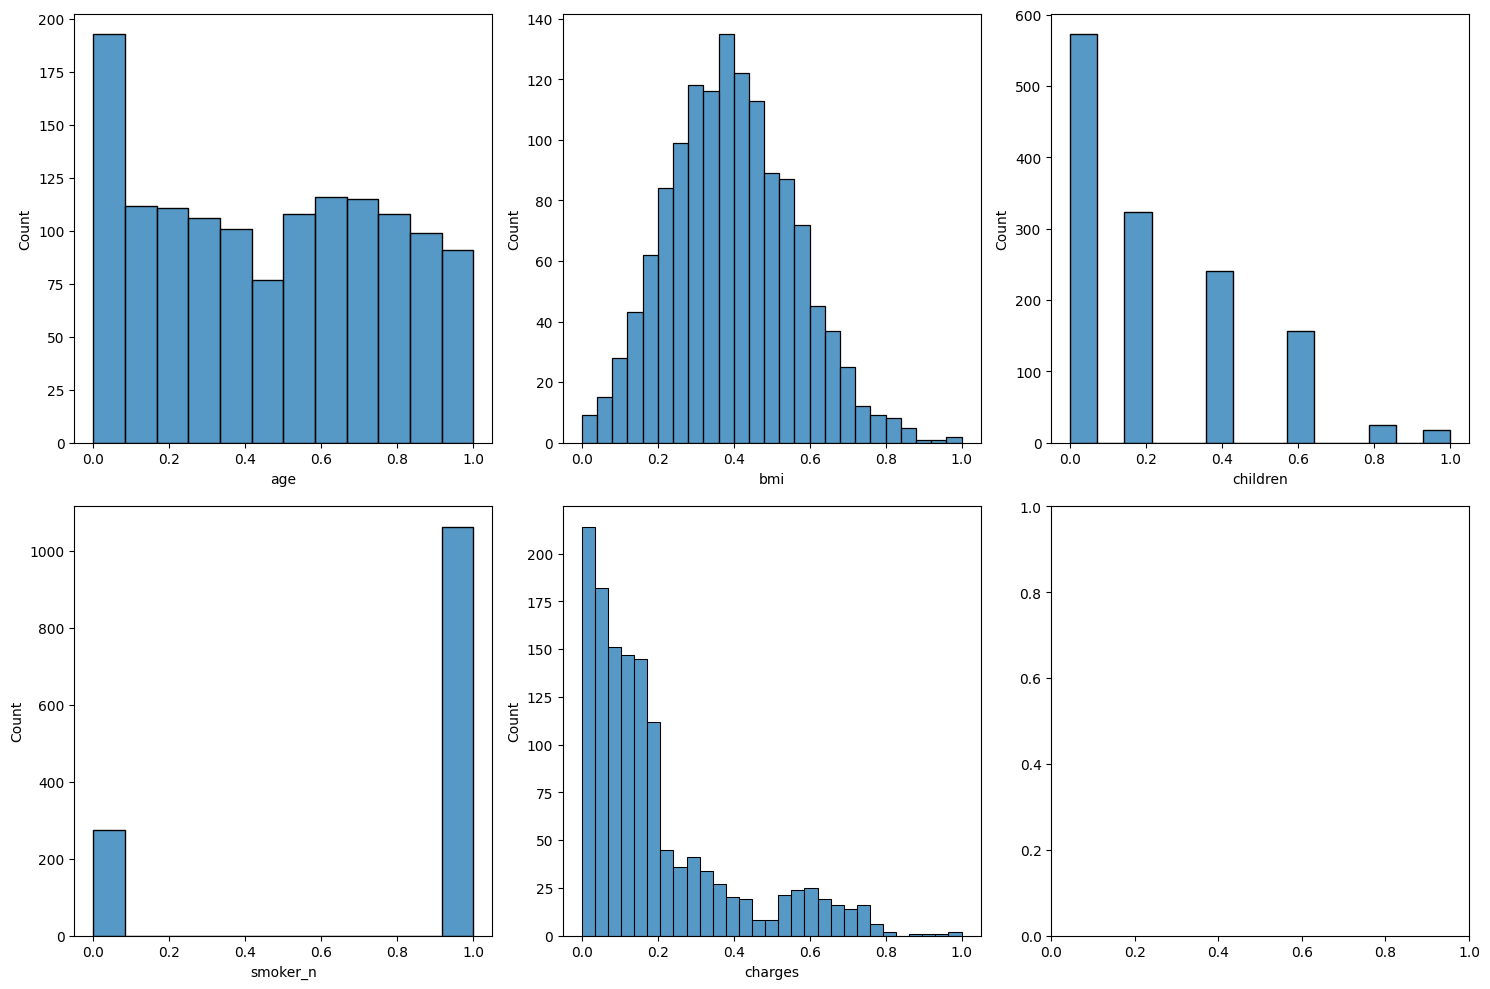

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear la matriz de gráficos
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

# Crear los gráficos para cada variable
sns.histplot(ax=axis[0, 0], data=total_data_scal, x='age')
sns.histplot(ax=axis[0, 1], data=total_data_scal, x='bmi')
sns.histplot(ax=axis[0, 2], data=total_data_scal, x='children')
sns.histplot(ax=axis[1, 0], data=total_data_scal, x='smoker_n')
sns.histplot(ax=axis[1, 1], data=total_data_scal, x='charges')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis sobre variables numéricas

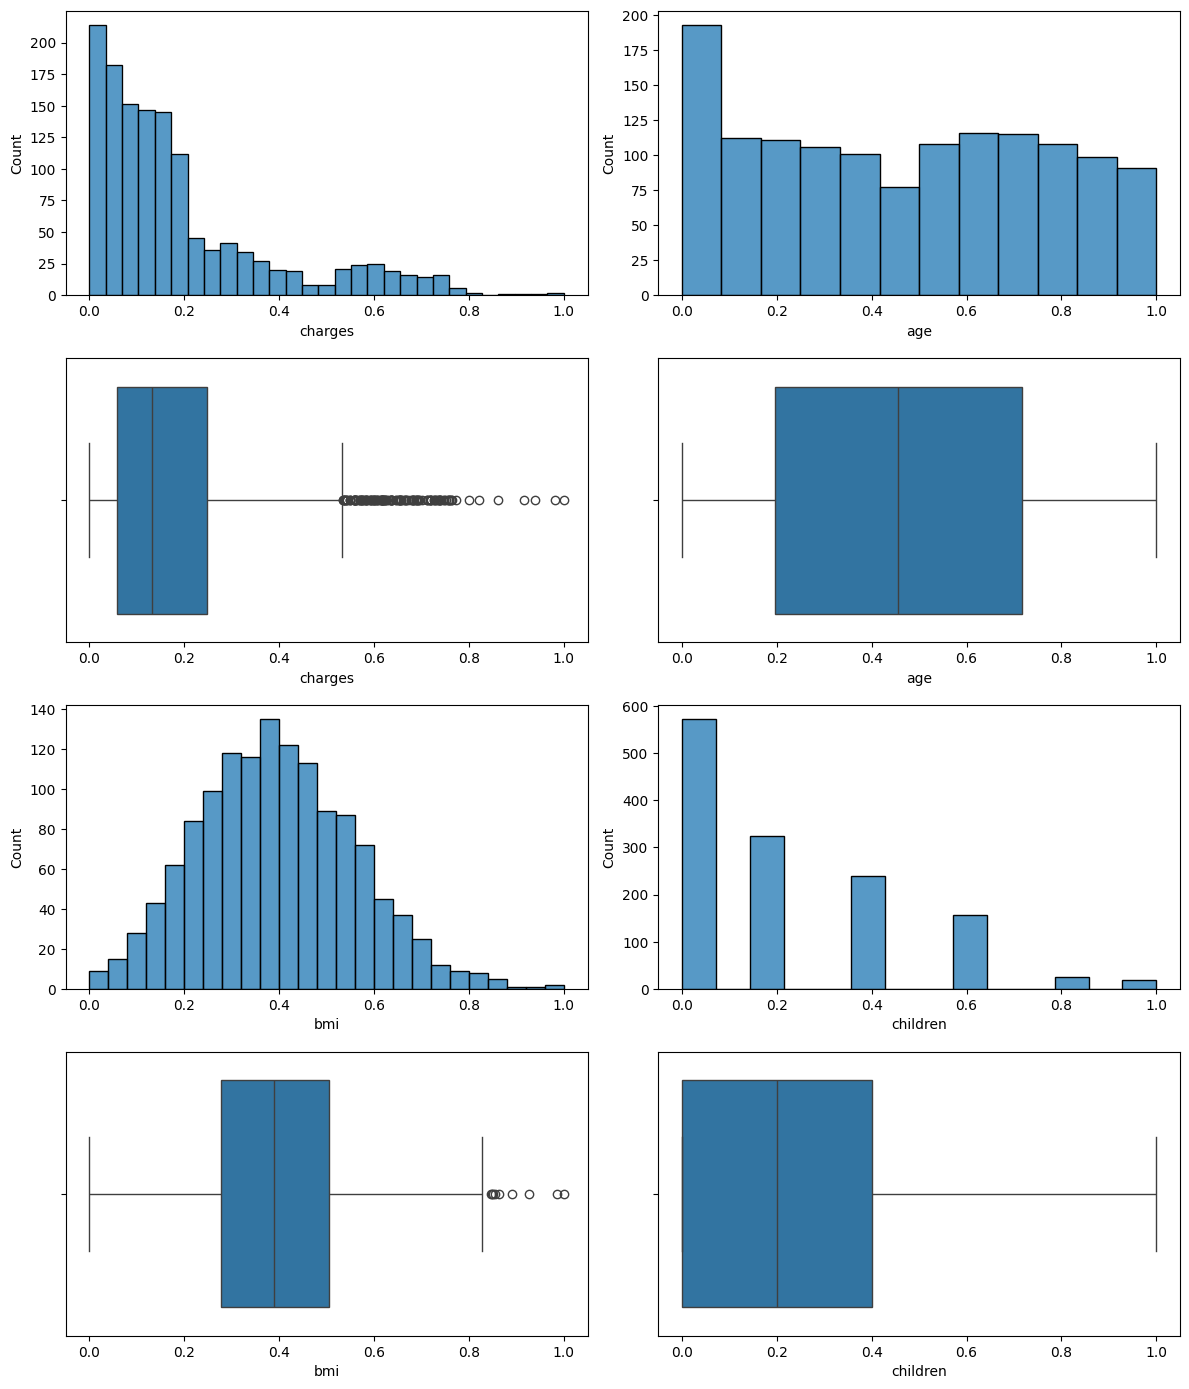

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(4, 2, figsize=(12, 14))

# Histogramas y diagramas de caja para 'charges'
sns.histplot(ax=axis[0, 0], data=total_data, x="charges")
sns.boxplot(ax=axis[1, 0], data=total_data, x="charges")

# Histogramas y diagramas de caja para 'age'
sns.histplot(ax=axis[0, 1], data=total_data, x="age")
sns.boxplot(ax=axis[1, 1], data=total_data, x="age")

# Histogramas y diagramas de caja para 'bmi'
sns.histplot(ax=axis[2, 0], data=total_data, x="bmi")
sns.boxplot(ax=axis[3, 0], data=total_data, x="bmi")

# Histogramas y diagramas de caja para 'children'
sns.histplot(ax=axis[2, 1], data=total_data, x="children")
sns.boxplot(ax=axis[3, 1], data=total_data, x="children")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis de variables multivariante

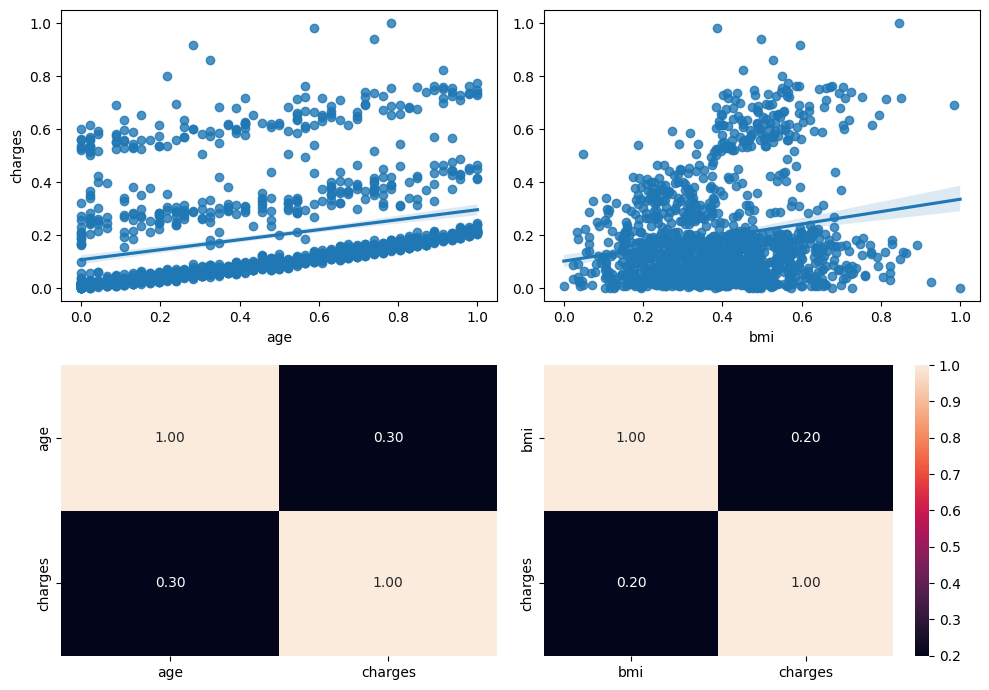

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con diagramas de dispersión y mapas de calor de correlación
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Diagrama de dispersión para 'age' vs 'charges'
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Diagrama de dispersión para 'bmi' vs 'charges'
sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges").set(ylabel=None)
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

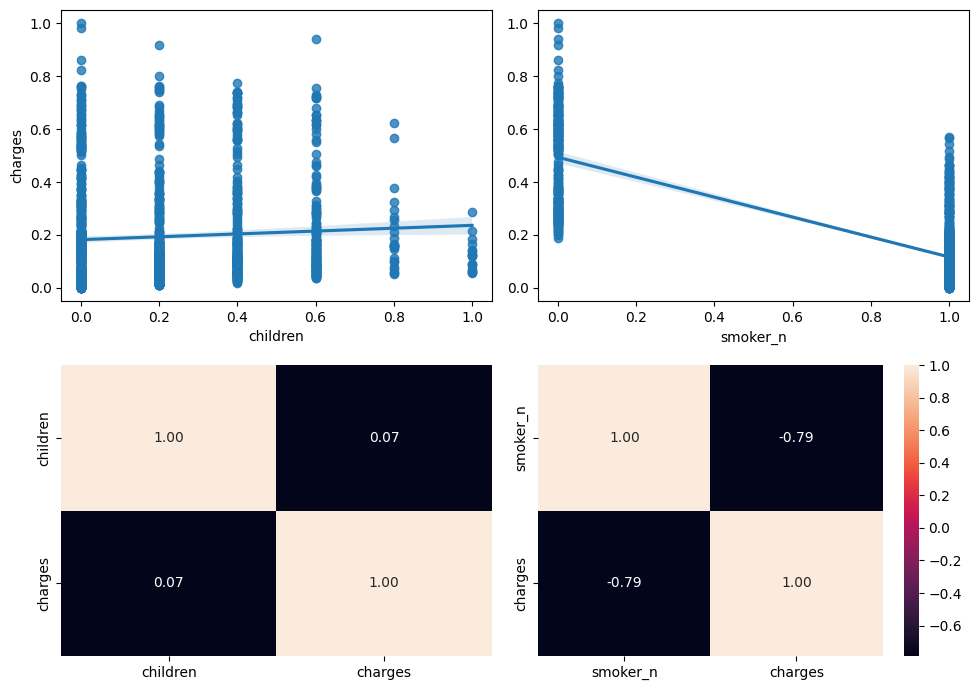

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con diagramas de dispersión y mapas de calor de correlación
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Diagrama de dispersión para 'children' vs 'charges'
sns.regplot(ax=axis[0, 0], data=total_data, x="children", y="charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Diagrama de dispersión para 'smoker_n' vs 'charges'
sns.regplot(ax=axis[0, 1], data=total_data, x="smoker_n", y="charges").set(ylabel=None)
sns.heatmap(total_data[["smoker_n", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

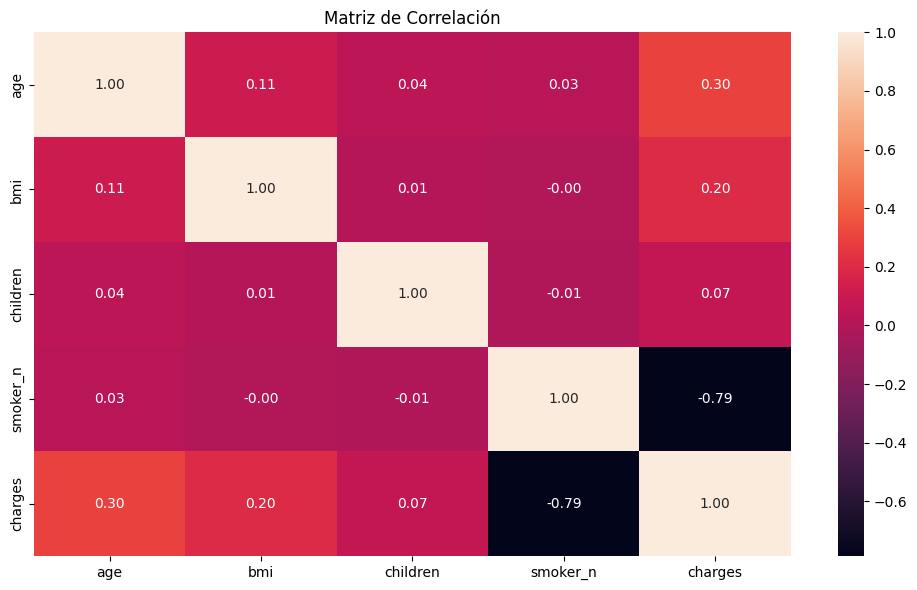

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes y calcular la matriz de correlación
cols_to_correlate = ['age', 'bmi', 'children', 'smoker_n', 'charges']
correlation_matrix = total_data[cols_to_correlate].corr()

# Generar un mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Hay una relacion grande entre la edad y el coste, igualmente influye negativamente el que sea fumador o no para el coste.

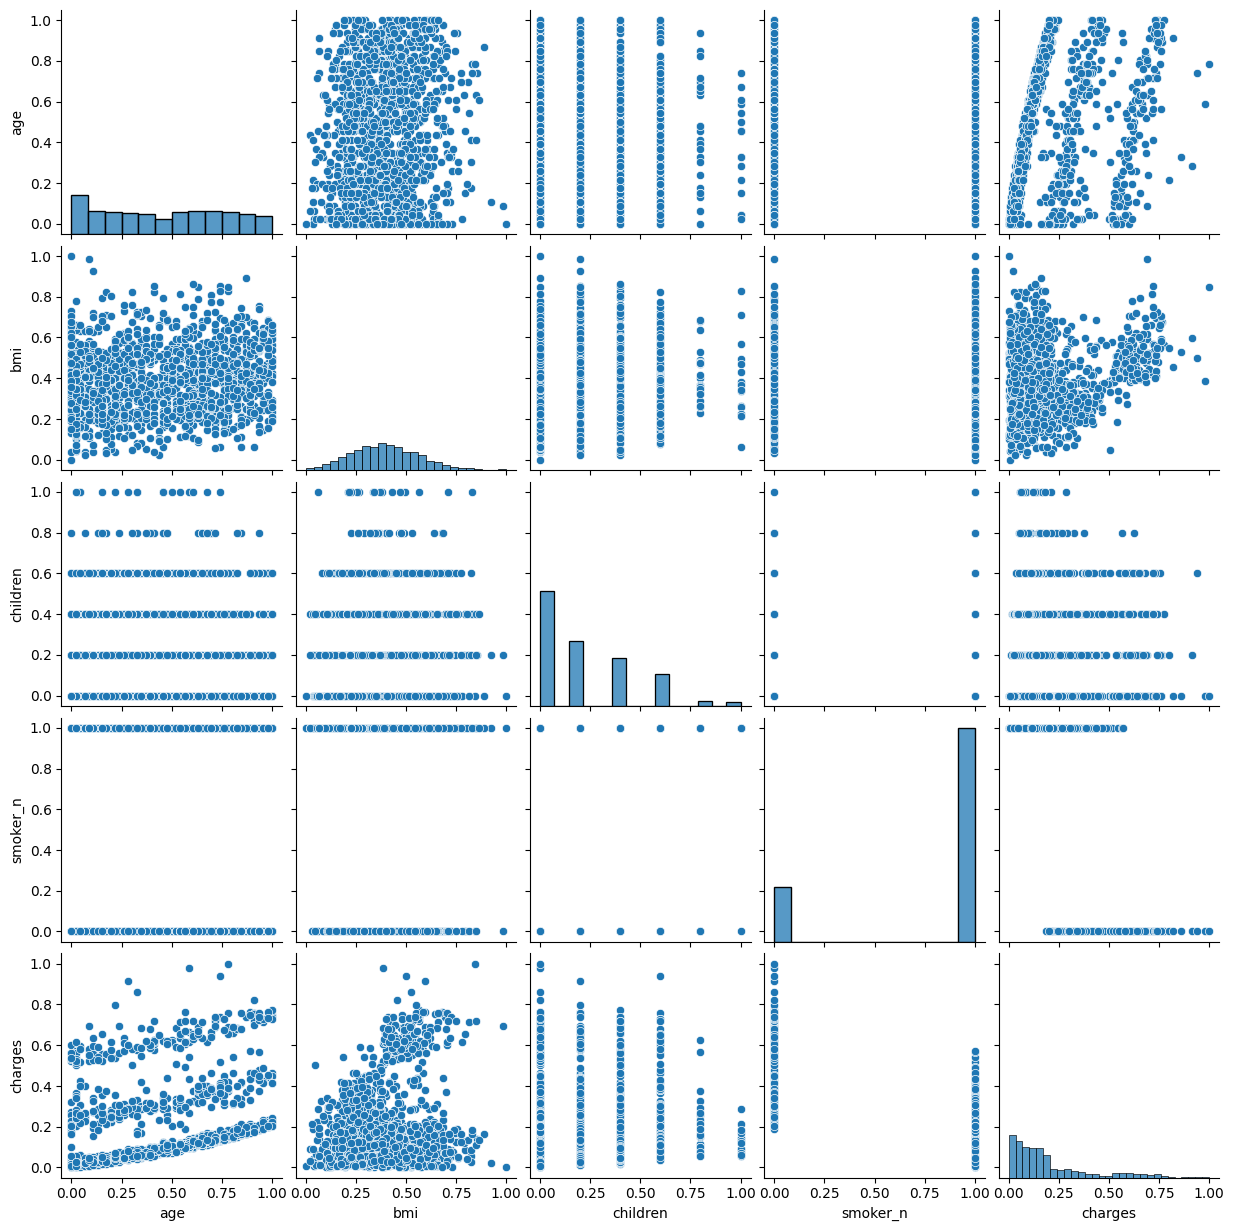

In [31]:
sns.pairplot(data = total_data)

Análisis de outliers

In [32]:
total_data.describe()

,age,bmi,children,smoker_n,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.461351,0.395573,0.219147,0.795064,0.194055
std,0.305312,0.164123,0.241114,0.403806,0.193306
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.277912,0.000000,1.000000,0.057854
50%,0.456522,0.388485,0.200000,1.000000,0.131915
75%,0.717391,0.504170,0.400000,1.000000,0.247984
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
import pandas as pd


# Obtener el número de columnas
num_columnas = total_data.shape[1]

# Obtener los nombres de las columnas
nombres_columnas = total_data.columns.tolist()

print("El DataFrame total_data tiene {} columnas:".format(num_columnas))
print(nombres_columnas)

El DataFrame total_data tiene 5 columnas:
['age', 'bmi', 'children', 'smoker_n', 'charges']


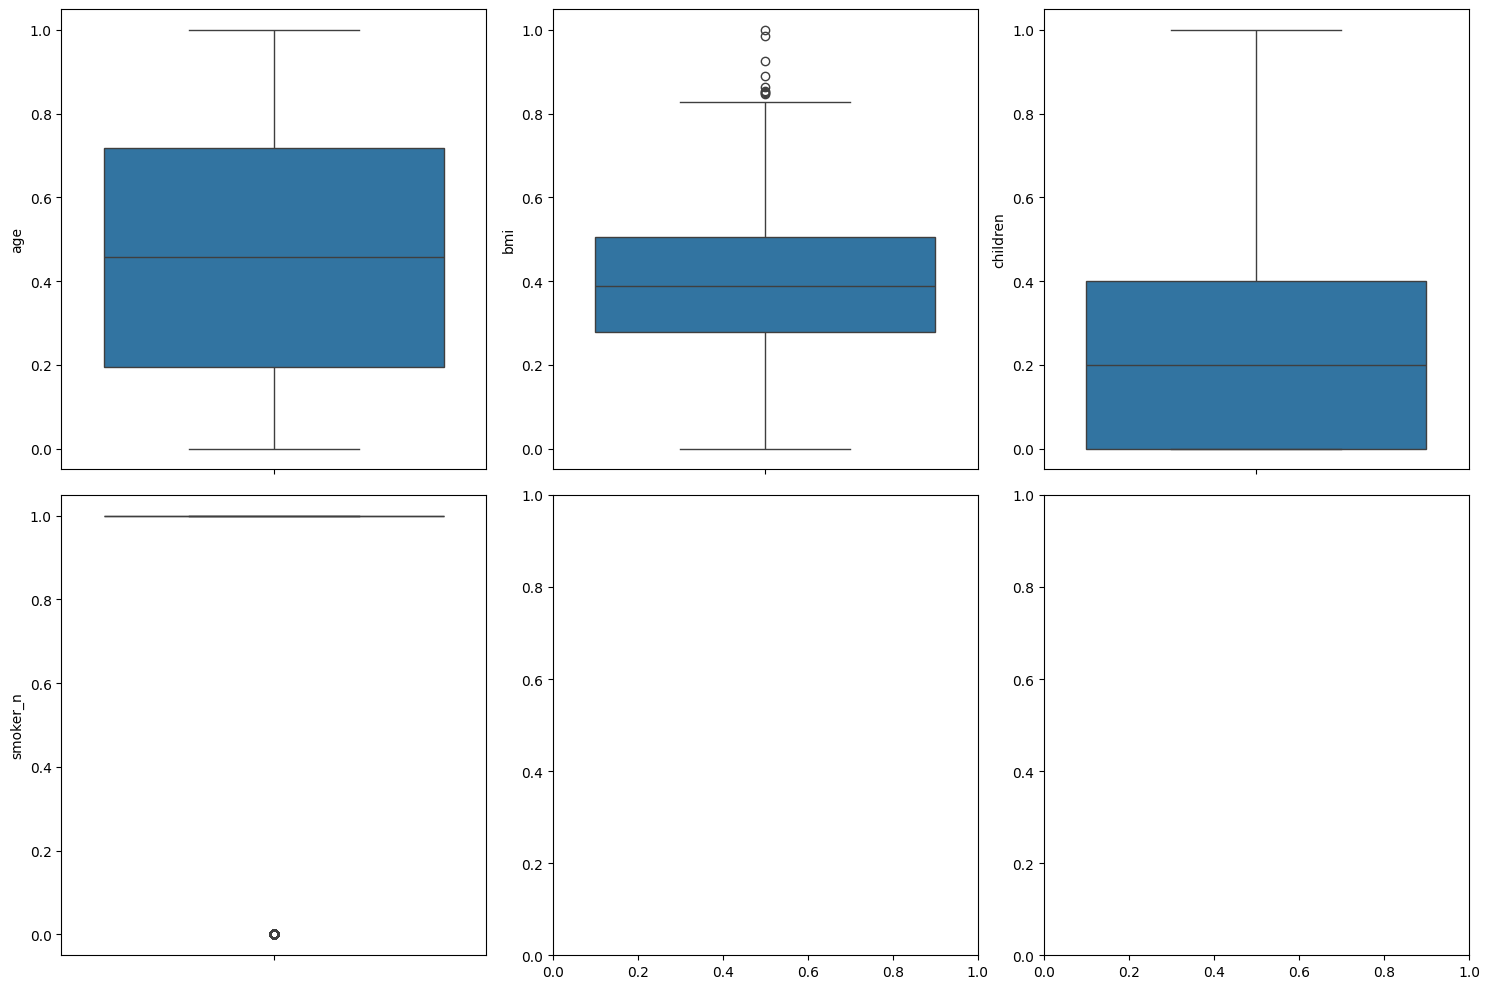

In [37]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "smoker_n")


plt.tight_layout()

plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son bmi y smoker

In [38]:
fare_stats = total_data["bmi"].describe()
fare_stats

count    1337.000000
mean        0.395573
std         0.164123
min         0.000000
25%         0.277912
50%         0.388485
75%         0.504170
max         1.000000
Name: bmi, dtype: float64

In [40]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 0.84 y -0.06, con un rango intercuartílico de 0.23


In [41]:
fare_stats = total_data["smoker_n"].describe()
fare_stats

count    1337.000000
mean        0.795064
std         0.403806
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: smoker_n, dtype: float64

In [42]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.0 y 1.0, con un rango intercuartílico de 0.0


No quitamos ningun dato ya que son insignificante 

Hacemos el entrenamiento del modelo y la divicion de Test y Train. Podemos hacer un seleckbest del 40% y podemos ver como solo deja las columnas que nos hace falta y las de mas importancia como son age, bmi , children y smoker_n

Mas adelante veremos un grafica donde veremos como se comportan las variables selecionadas con la variable objetivo 

In [4]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
# División del conjunto de datos:
X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Selección de características: Se utiliza SelectKBest junto con el método f_regression para seleccionar las mejores características 
# basadas en la relación con la variable objetivo (charges). El parámetro k se establece en 4, lo que significa que se seleccionarán 
# las 4 mejores características.

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

# Identificación de columnas seleccionadas: Se obtienen las columnas seleccionadas utilizando el método get_support() 
# y se almacenan en selected_columns.

selected_columns = X_train.columns[selection_model.get_support()]

# Transformación de conjuntos de entrenamiento y prueba
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

# Visualización de las primeras filas del conjunto de entrenamiento seleccionado
X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [5]:
# Visualizacion de X_test

X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [6]:
# Guardamos 

X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [7]:
# Empezamos con el modelo de Regresion Lineal.

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


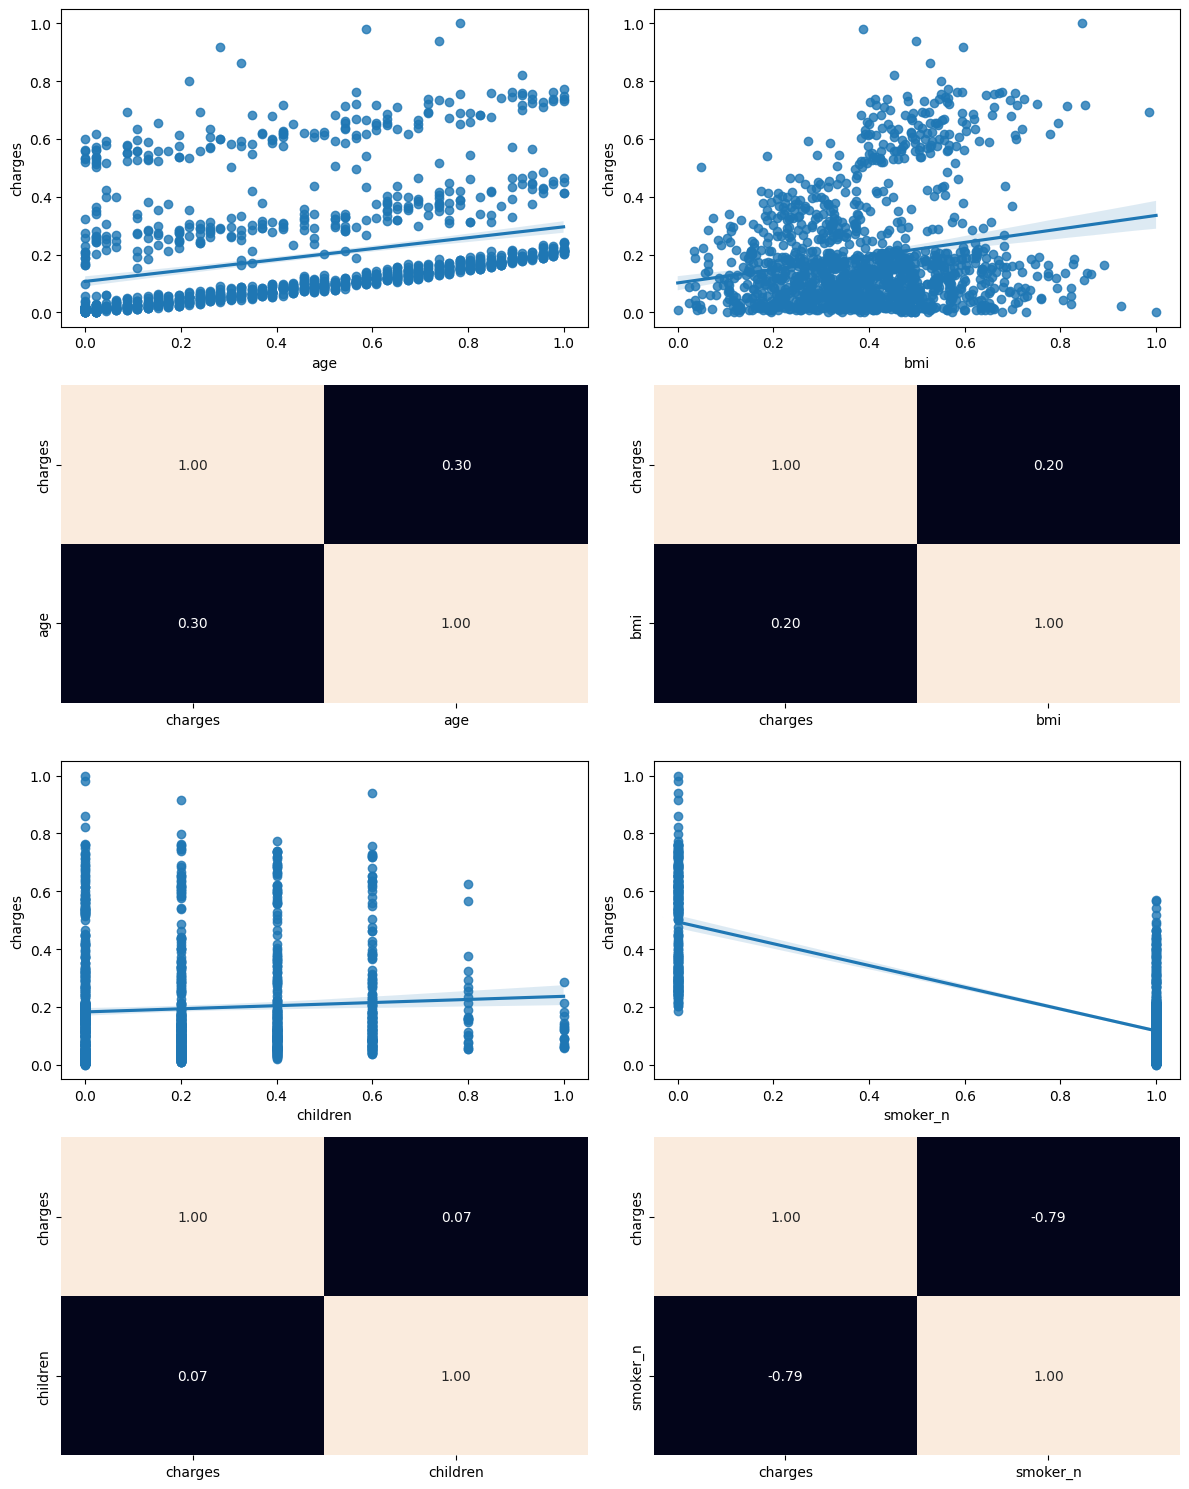

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (12, 15))
total_data = pd.concat([train_data, test_data])

# Graficar para la característica 'age'
sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Graficar para la característica 'bmi'
sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Graficar para la característica 'children'
sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

# Graficar para la característica 'smoker_n'
sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

# Este código realiza un análisis visual de la relación entre varias características (age, bmi, children, smoker_n) 
# y la variable objetivo (charges) en un conjunto de datos que combina datos de entrenamiento (train_data) y datos de prueba (test_data).

In [9]:
# Eliminamos nuestra variable Y ( charges ) de la variable X. Ya que nuestro objetivo es la variable charges

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [10]:
# Hacemos el modelo de Regresion Lineal 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Después del proceso de entrenamiento podemos conocer los parámetros (variables a y b) que ha ajustado el modelo:

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1,b2 ,b3 ,b4): {model.coef_}")

# Tendrías b1​ para 'age', b2​ para 'bmi', b3​ para 'children', y b4​ para 'smoker_n'. La cantidad total de variables b es igual 
# al número de variables independientes en tu modelo.

Intercepto (a): 0.3195827183308946
Coeficientes (b1,b2 ,b3 ,b4): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")


Error cuadrático medio: 0.009150574110332004
Coeficiente de determinación: 0.8045531086669286


Un modelo de Regresión Lineal no tiene hiperparámetros que optimizar. Debemos utilizar otro modelo para realizar mejoras como un modelo regularizado